Le but est de compléter les valeurs manquantes de la dureté (Hardness, HV) en utilisant une formule physique bien établie dérivée d’études métallurgiques (Pavlina & Van Tyne, 2008).

Cette relation exprime une corrélation linéaire entre la dureté Vickers (HV) et la limite d’élasticité (Yield Strength) pour les aciers.
Ainsi, si la dureté est inconnue mais que la résistance (Yield Strength) est disponible, on peut estimer la dureté de manière fiable.

Source : Pavlina, E.J. & Van Tyne, C.J. (2008).
Correlation of Yield Strength and Tensile Strength with Hardness for Steels.
Journal of Materials Engineering and Performance, Vol. 17(6), pp. 888–893.
DOI: 10.1007/s11665-008-9225-5

Formule extraite de l’article :

Yield Strength (MPa)=−90.7+2.876×HV
Yield Strength (MPa)=−90.7+2.876×HV

En isolant HV :

HV=Yield Strength+90.72.876
HV=
2.876
Yield Strength+90.7
	​


On commence par charger le fichier CSV contenant toutes les données déjà nettoyées et complétées partiellement
Ce fichier contient notamment la colonne "Yield strength (MPa)", dont on va se servir pour estimer la dureté.

In [ ]:
import pandas as pd
import numpy as np

# Chargement du fichier de travail
df = pd.read_csv("/content/weld_data_yield_strength_predicted_ML")

print("✅ Dataset chargé avec succès !")
print("Nombre de lignes :", len(df))
print("Colonnes disponibles :", list(df.columns))


✅ Dataset chargé avec succès !
Nombre de lignes : 1652
Colonnes disponibles : ['Carbon concentration (weight \\%)', 'Silicon concentration (weight \\%)', 'Manganese concentration (weight \\%)', 'Sulphur concentration (weight \\%)', 'Phosphorus concentration (weight \\%)', 'Nickel concentration (weight \\%)', 'Chromium concentration (weight \\%)', 'Molybdenum concentration (weight \\%)', 'Vanadium concentration (weight \\%)', 'Copper concentration (weight \\%)', 'Cobalt concentration (weight \\%)', 'Tungsten concentration (weight \\%)', 'Oxygen concentration (parts per million by weight)', 'Titanium concentration (parts per million by weight)', 'Nitrogen concentration (parts per million by weight)', 'Aluminium concentration (parts per million by weight)', 'Boron concentration (parts per million by weight)', 'Niobium concentration (parts per million by weight)', 'Tin concentration (parts per million by weight)', 'Arsenic concentration (parts per million by weight)', 'Antimony concentrati

On va appliquer la relation empirique de Pavlina & Van Tyne (2008) pour estimer la dureté Vickers (HV) à partir de la limite d’élasticité (Yield Strength).
Chaque ligne du tableau sera traitée :

Si la valeur de Yield Strength est disponible → on calcule HV,

Sinon → on laisse la cellule vide (NaN).

In [ ]:
# Fonction de prédiction basée sur Pavlina & Van Tyne (2008)
def predict_hardness_physical(row):
    if not np.isnan(row['Yield strength (MPa)']):
        return (row['Yield strength (MPa)'] + 90.7) / 2.876
    else:
        return np.nan

# Application de la formule
df['Hardness_pred_phys'] = df.apply(predict_hardness_physical, axis=1)

print("✅ Colonne 'Hardness_pred_phys' créée avec les valeurs physiques estimées.")


✅ Colonne 'Hardness_pred_phys' créée avec les valeurs physiques estimées.


In [ ]:
# --- 4️⃣ Évaluation de la corrélation ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# --- 4️⃣ Évaluation de la corrélation ---
r2 = r2_score(df['Hardness (kg mm$^{-2}$)'], df['Hardness_pred_phys'])
mae = mean_absolute_error(df['Hardness (kg mm$^{-2}$)'], df['Hardness_pred_phys'])
rmse = np.sqrt(mean_squared_error(df['Hardness (kg mm$^{-2}$)'], df['Hardness_pred_phys']))

print("\n📘 Résumé de la vérification :")
print(f"R² : {r2:.4f}")
print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"Nombre de points utilisés : {len(df)}")


📘 Résumé de la vérification :
R² : 0.8361
MAE : 1.8116
RMSE : 12.8154
Nombre de points utilisés : 1652


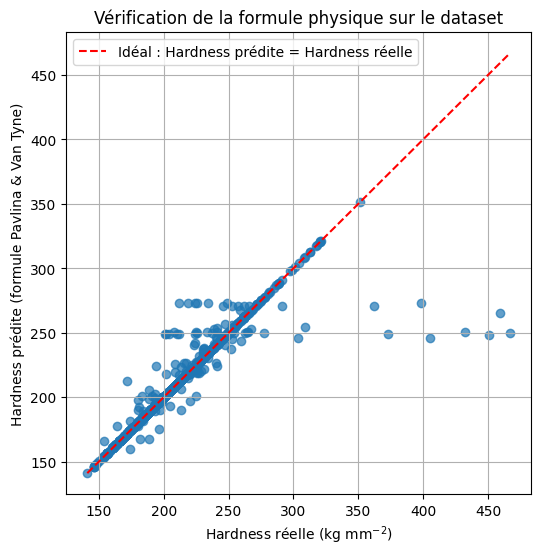

In [ ]:
# --- 5️⃣ Visualisation graphique ---
plt.figure(figsize=(6,6))
plt.scatter(df['Hardness (kg mm$^{-2}$)'], df['Hardness_pred_phys'], alpha=0.7)
plt.plot(
    [df['Hardness (kg mm$^{-2}$)'].min(), df['Hardness (kg mm$^{-2}$)'].max()],
    [df['Hardness (kg mm$^{-2}$)'].min(), df['Hardness (kg mm$^{-2}$)'].max()],
    'r--', label="Idéal : Hardness prédite = Hardness réelle"
)
plt.xlabel("Hardness réelle (kg mm$^{-2}$)")
plt.ylabel("Hardness prédite (formule Pavlina & Van Tyne)")
plt.title("Vérification de la formule physique sur le dataset")
plt.legend()
plt.grid(True)
plt.show()

On remplace ensuite les valeurs manquantes de la colonne “Hardness (HV)” par les valeurs prédites grâce à la formule physique.
Cela permet d’obtenir une colonne complète sans trous.

In [ ]:
# Remplacement des valeurs manquantes
df['Hardness (kg mm$^{-2}$)'] = df['Hardness (kg mm$^{-2}$)'].fillna(df['Hardness_pred_phys'])

print("✅ Valeurs manquantes de 'Hardness (kg mm$^{-2}$)' remplacées par les estimations physiques.")


✅ Valeurs manquantes de 'Hardness (kg mm$^{-2}$)' remplacées par les estimations physiques.


On vérifie qu’il ne reste plus de valeurs manquantes dans la colonne de dureté,puis on enregistre le nouveau fichier complété.

In [ ]:
# Vérification
missing = df['Hardness (kg mm$^{-2}$)'].isnull().sum()
print(f"🔍 Valeurs manquantes restantes dans 'Hardness (kg mm$^{-2}$)' : {missing}")

# Sauvegarde
df.to_csv("welddb_completed_hardness_phys", index=False)
print("💾 Fichier enregistré : welddb_completed_hardness_phys.csv")


🔍 Valeurs manquantes restantes dans 'Hardness (kg mm$^-2$)' : 0
💾 Fichier enregistré : welddb_completed_hardness_phys.csv
